In [45]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [62]:
x_train = np.array([1.0, 2.0, 3.0, 4.0])
y_train = np.array([300.0, 500.0, 700, 860])
print(x_train)
print(y_train)

[1. 2. 3. 4.]
[300. 500. 700. 860.]


In [63]:
m = x_train.shape[0]            # No of Training Examples
print(x_train.shape)
print(m)

(4,)
4


Visulaizing the Training Example

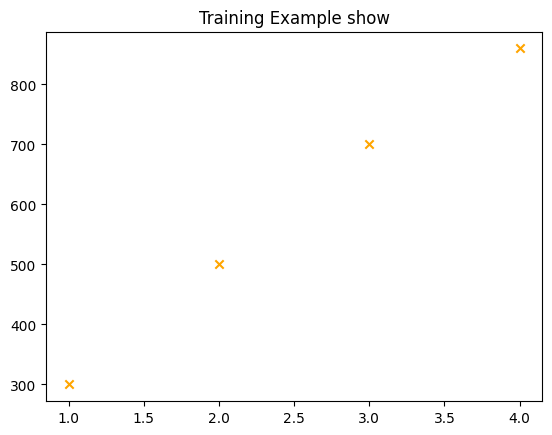

In [64]:
plt.scatter(x_train, y_train, marker = 'x' , color = 'orange')
plt.title('Training Example show')
plt.show()

Initializing the Weight and Bais

In [65]:
w = 200
b = 50

Model Linear Regression

In [66]:
def model(X, m, w, b):

    F_wb = np.zeros(m)
    for i in range(m):
        F_wb[i] = X[i]*w + b

    return F_wb        

In [68]:
y_predict = model(x_train, m, w, b)

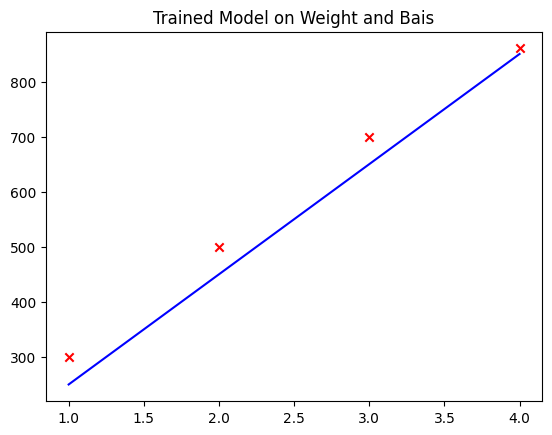

In [69]:
def compute_Graph(x_train, y_train, y_predict):
    plt.plot(x_train, y_predict, color="blue")
    plt.scatter(x_train, y_train, marker="x", color="red")

    plt.title("Trained Model on Weight and Bais")
    plt.show()

compute_Graph(x_train, y_train, y_predict)

### Computing Cost of our Model.

In [70]:
def Cost(X, Y, w, b, m):
    F_wb = np.zeros(m)
    total_cost = 0

    for i in range(m):
        F_wb[i] = X[i]*w + b

        cost = (F_wb[i] - Y[i]) **2
        total_cost += cost 

    total_cost  = (1/(2*m)) * total_cost 

    return total_cost 

In [71]:
parameter_cost = Cost(x_train, y_train, w, b, m)

parameter_cost

950.0

### Optimizing Parameter: Weight and Bais using Gradient Descent.

In [72]:
def gradient_function(X, Y, w, b, m):
    
    F_wb = np.zeros(m)
    Total_gb , Total_gw = 0,0

    for i in range(m):
        F_wb[i] = X[i]*w  + b
        g_w = (F_wb[i] - Y[i]) * X[i]
        g_b = (F_wb[i] - Y[i])

        Total_gw += g_w  
        Total_gb += g_b

    Total_gw = Total_gw / m
    Total_gb = Total_gb / m

    return Total_gw, Total_gb

In [73]:
def compute_gradient(X,Y, w, b, m, alpha):

    # Good for Visualizing How parameters Changed
    cost_history = []
    para_history = []

    # deep copy of w,b as not to change global.
    w_in = copy.deepcopy(w)
    b_in = copy.deepcopy(b)

    # No of epochs: 10000
    for i in range(10000):
        upgraded_w, upgraded_b = gradient_function(X, Y, w_in, b_in, m)

        cost_history.append(Cost(X, Y, upgraded_w, upgraded_b, m))
        para_history.append([upgraded_w, upgraded_b])
        
        w_in = w_in - (alpha * upgraded_w)
        b_in = b_in - (alpha * upgraded_b)


    return w_in, b_in, cost_history, para_history

In [74]:
alpha = 0.01

w_final, b_final, cost_history, para_history = compute_gradient(x_train, y_train, w, b, m, alpha)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (188.0000,120.0000)


### Computing Model and Visualizing Results on given W, B

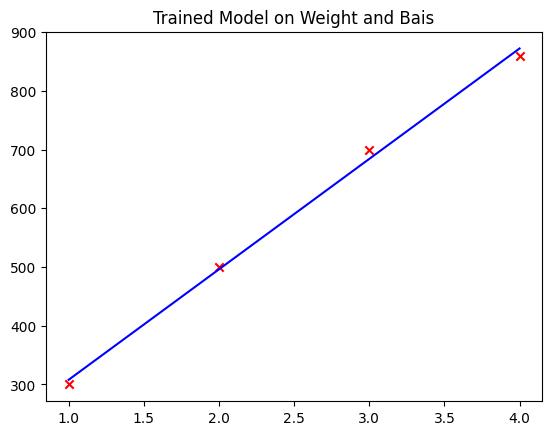

In [75]:
y_predict = model(x_train, m, w_final, b_final)


compute_Graph(x_train, y_train, y_predict)